# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_weather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a for loop to run through each city in the cities list, creata a list to hold info for data frame
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
print(f"Beginning data retrieval")
print(f"--------------------------------")
for i,city in enumerate(cities):

# Create the URL for the corresponding city
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_weather}&units=imperial"
    
# Perform the "requests.get().json()"
    response = requests.get(url).json()
    if "main" not in response:
        print(f"City not found....Skipping")
        continue

# Get the info for the data frame (store into lists using .append)
    city_name.append(response["name"])
    latitude.append(response["coord"]["lat"])
    longitude.append(response["coord"]["lon"])
    max_temp.append(response["main"]["temp_max"])
    humidity.append(response["main"]["humidity"])
    cloudiness.append(response["clouds"]["all"])
    wind_speed.append(response["wind"]["speed"])
    country.append(response["sys"]["country"])
    date.append(response["dt"])

# Print out the correct string "Processing Record #| city_name"
    print(f'Processing Record {i}| {city}')
print(f"--------------------------------")
print(f"Data retrieval complete")
print(f"--------------------------------")

Beginning data retrieval
--------------------------------
Processing Record 0| kindu
Processing Record 1| dauphin
Processing Record 2| saint-philippe
Processing Record 3| port hardy
Processing Record 4| san quintin
Processing Record 5| zhanakorgan
Processing Record 6| manchar
Processing Record 7| kabanjahe
Processing Record 8| nikolskoye
Processing Record 9| rikitea
Processing Record 10| barrow
Processing Record 11| catuday
Processing Record 12| socond
Processing Record 13| hamilton
Processing Record 14| arraial do cabo
Processing Record 15| tuktoyaktuk
Processing Record 16| avarua
Processing Record 17| hilo
Processing Record 18| hermanus
Processing Record 19| broken hill
Processing Record 20| port alfred
Processing Record 21| clyde river
Processing Record 22| carnarvon
Processing Record 23| georgetown
Processing Record 24| tecpan
Processing Record 25| burg
Processing Record 26| punta arenas
Processing Record 27| hobart
Processing Record 28| vaini
Processing Record 29| yar-sale
Process

Processing Record 260| conde
Processing Record 261| nehe
Processing Record 262| coahuayana
Processing Record 263| bethel
Processing Record 264| raudeberg
Processing Record 265| shoreline
Processing Record 266| pacasmayo
Processing Record 267| olinda
Processing Record 268| provideniya
Processing Record 269| upernavik
Processing Record 270| oxford
Processing Record 271| namibe
Processing Record 272| camacha
Processing Record 273| whitefish
Processing Record 274| shekhupura
Processing Record 275| motomiya
Processing Record 276| straumen
Processing Record 277| port macquarie
Processing Record 278| puerto quijarro
Processing Record 279| lavrentiya
Processing Record 280| mount gambier
Processing Record 281| mlonggo
Processing Record 282| chara
Processing Record 283| villanueva de la serena
Processing Record 284| vila nova de milfontes
Processing Record 285| shirokiy
Processing Record 286| borogontsy
Processing Record 287| dabwali
Processing Record 288| santa maria
Processing Record 289| pada

Processing Record 517| bontang
Processing Record 518| irbil
Processing Record 519| bacolod
Processing Record 520| monteagudo
Processing Record 521| avera
Processing Record 522| hinatuan
City not found....Skipping
Processing Record 524| smoky lake
Processing Record 525| gaillac
Processing Record 526| nsunga
City not found....Skipping
Processing Record 528| farafenni
Processing Record 529| kupino
Processing Record 530| denpasar
Processing Record 531| masallatah
Processing Record 532| vega de alatorre
Processing Record 533| prince rupert
Processing Record 534| muli
Processing Record 535| phonhong
Processing Record 536| jabinyanah
Processing Record 537| saldanha
Processing Record 538| lukovetskiy
Processing Record 539| aswan
Processing Record 540| cotonou
Processing Record 541| ilo
Processing Record 542| bandar-e lengeh
Processing Record 543| yurginskoye
Processing Record 544| hami
Processing Record 545| great yarmouth
Processing Record 546| tome
Processing Record 547| papetoai
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_info = {"City":city_name,
             "Lat":latitude,
             "Lng":longitude,
             "Max Temp":max_temp,
             "Humidity":humidity,
             "Cloudiness":cloudiness,
             "Wind Speed":wind_speed,
             "Country":country,
             "Date":date
             }
city_df = pd.DataFrame(city_info)
city_df.head()

# Save the data fram in a .csv file
city_df.to_csv('city_df.csv', index = False, header=True)

In [5]:
# Print out a description of the data frame using .describe()
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,20.629360,14.293894,56.067112,72.652651,54.071298,8.104223,1.606239e+09
std,32.660474,89.970202,26.035448,20.316543,37.821593,5.921329,9.955218e+01
min,-54.800000,-175.200000,-21.930000,11.000000,0.000000,0.020000,1.606238e+09
25%,-6.500000,-64.345000,38.065000,62.500000,18.000000,3.390000,1.606239e+09
50%,27.670000,20.830000,61.750000,78.000000,63.000000,6.930000,1.606239e+09
75%,46.705000,92.150000,76.640000,88.000000,90.000000,11.075000,1.606239e+09
max,77.480000,179.320000,107.650000,100.000000,100.000000,40.260000,1.606239e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Use loc to locate the rows that have humidity less than or equal to 100 and print out
city_low_humidity = city_df.loc[city_df["Humidity"] <= 100]
city_low_humidity.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kindu,-2.95,25.95,70.50,93,98,1.32,CD,1606238556
1,Dauphin,51.15,-100.05,26.60,92,90,14.99,CA,1606238557
2,Saint-Philippe,-21.36,55.77,75.20,78,53,8.99,RE,1606238558
3,Port Hardy,50.70,-127.42,42.80,100,90,4.70,CA,1606238558
4,San Quintín,30.48,-115.95,61.52,68,3,3.67,MX,1606238558


In [7]:
#  Get the indices of cities that have humidity over 100%.
# Use the loc to locate rows that humidity greater than 100
city_high_humidity = city_df.loc[city_df["Humidity"] > 100]
city_high_humidity

# Results show that there are no cities that have humidity greater than 100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Find the Q1 and Q3 of humidity, then find the upper and lower bounds, then use loc to find all the cities that have humidities between the upper and lower bounds
lower_quart = city_df.describe()["Humidity"][4]
upper_quart = city_df.describe()["Humidity"][6]
iqr = (upper_quart - lower_quart)
lower_bound = lower_quart - (1.5 * iqr)
upper_bound = upper_quart + (1.5 * iqr)
print(f"The lower bound for humidity is {lower_bound} and the upper bound for humidity is {upper_bound}.")
clean_city_data = city_df.loc[(city_df["Humidity"] > lower_bound) & (city_df["Humidity"] < upper_bound)]
clean_city_data.head()

The lower bound for humidity is 24.25 and the upper bound for humidity is 126.25.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kindu,-2.95,25.95,70.50,93,98,1.32,CD,1606238556
1,Dauphin,51.15,-100.05,26.60,92,90,14.99,CA,1606238557
2,Saint-Philippe,-21.36,55.77,75.20,78,53,8.99,RE,1606238558
3,Port Hardy,50.70,-127.42,42.80,100,90,4.70,CA,1606238558
4,San Quintín,30.48,-115.95,61.52,68,3,3.67,MX,1606238558


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

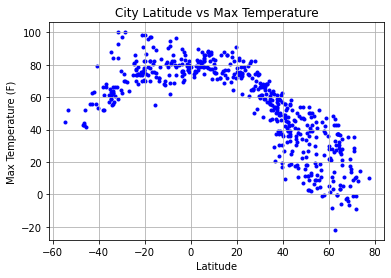

In [9]:
# Make a scatter plot showing latitude vs max temp using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Max Temp"]
plt.scatter(x_axis, y_axis, marker=".", color="blue")
plt.grid()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("latitude_vs_temperature.png")
plt.show()

## Latitude vs. Humidity Plot

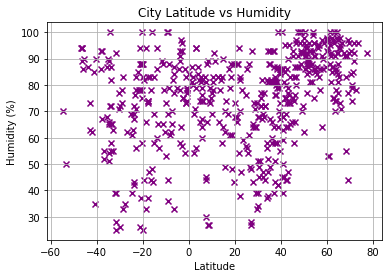

In [10]:
# Make a scatter plot showing latitude vs humidity using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Humidity"]
plt.scatter(x_axis, y_axis, marker="x", color="purple")
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("latitude_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

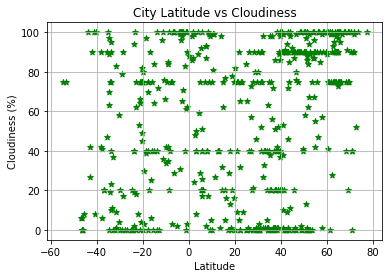

In [11]:
# Make a scatter plot showing latitude vs humidity using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="*", color="green",)
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("latitude_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

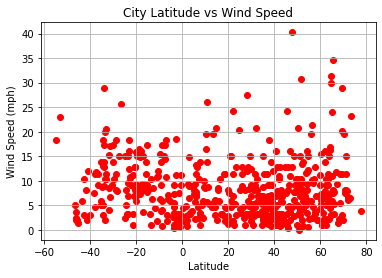

In [12]:
# Make a scatter plot showing latitude vs humidity using the clean_city_data
# Store the x and y axis as variables from the very beginning
# Use proper labels on x and y axis, store the plot as a PNG image
x_axis = clean_city_data["Lat"]
y_axis = clean_city_data["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", color="red",)
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("latitude_vs_wind_speed.png")
plt.show()

## Linear Regression

In [13]:
# Calculate the linear regression model for the northern hemisphere and southern hemishpere separately
# Use the loc on latitude to find the cities that have latitude greater than 0 (north) and less than 0 (south)
x_values_north = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values_north = clean_city_data.loc[clean_city_data["Lat"] > 0]["Max Temp"]
x_values_south = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values_south = clean_city_data.loc[clean_city_data["Lat"] < 0]["Max Temp"]

# Perform the linear regression using linregress on the north values and then on the south values
(slope_north_temp, int_north_temp, rvalue_north_temp, pvalue_north_temp, stderr_north_temp) = linregress(x_values_north, y_values_north)
(slope_south_temp, int_south_temp, rvalue_south_temp, pvalue_south_temp, stderr_south_temp) = linregress(x_values_south, y_values_south)

# Print out a statement for the correlation coefficient
print(f"The correlation coefficient is {round(rvalue_north_temp,3)} for the northern hemisphere maximum temperatures.")
print(f"The correlation coefficient is {round(rvalue_south_temp,3)} for the southern hemisphere maximum temperatures.")
print("-----------------------")

# Print out the two equations for the linear model
regress_values_north = x_values_north * slope_north_temp + int_north_temp
line_eq_north = "y = " + str(round(slope_north_temp,2)) + "x +" + str(round(int_north_temp,2))
print(f"The least squares regression line for northern hemisphere cities is given by {line_eq_north}.")
regress_values_south = x_values_south * slope_south_temp + int_south_temp
line_eq_south = "y = " + str(round(slope_south_temp,2)) + "x +" + str(round(int_south_temp,2))
print(f"The least squares regression line for southern hemisphere cities is given by {line_eq_south}.")

The correlation coefficient is -0.867 for the northern hemisphere maximum temperatures.
The correlation coefficient is 0.6 for the southern hemisphere maximum temperatures.
-----------------------
The least squares regression line for northern hemisphere cities is given by y = -1.17x +92.88.
The least squares regression line for southern hemisphere cities is given by y = 0.57x +85.59.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8670179685242707


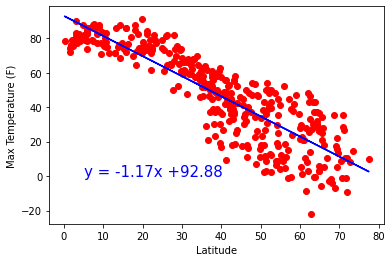

In [14]:
# Create scatter plot for the northern hemisphere cities measuring the latitude vs max temperature
# Include the line of best fit on the plot as well
print(f"The r-value is: {rvalue_north_temp}")
plt.scatter(x_values_north, y_values_north, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(x_values_north, regress_values_north, "b-")
plt.annotate(line_eq_north,(5,0),fontsize=15,color="blue")
plt.savefig("northern_latitude_vs_temperature.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6000943598684204


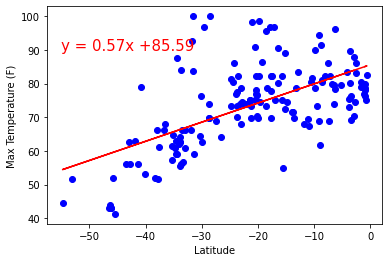

In [15]:
# Create scatter plot for the southern hemisphere cities measuring the latitude vs max temperature
# Include the line of best fit on the plot as well
print(f"The r-value is: {rvalue_south_temp}")
plt.scatter(x_values_south, y_values_south, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(x_values_south, regress_values_south, "r-")
plt.annotate(line_eq_south,(-55,90),fontsize=15,color="red")
plt.savefig("southern_latitude_vs_temperature.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3776980109998795


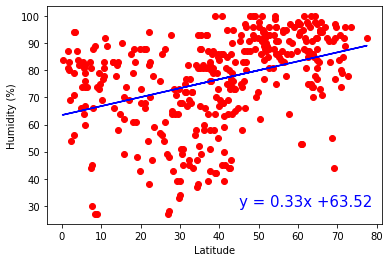

In [16]:
# Calculate the linear regression model for humidity in northern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Humidity"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq, (45,30), fontsize=15, color="blue")
plt.savefig("northern_latitude_vs_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06699737969864335


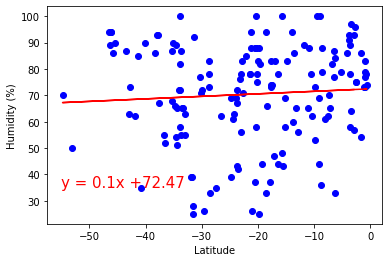

In [17]:
# Calculate the linear regression model for humidity in southern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Humidity"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,35), fontsize=15, color="red")
plt.savefig("southern_latitude_vs_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.30416569668403504


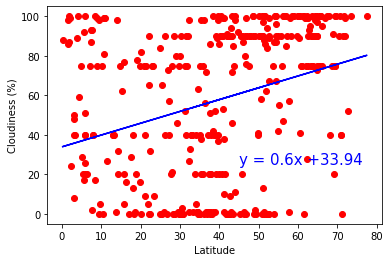

In [18]:
# Calculate the linear regression model for cloudiness in northern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Cloudiness"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq, (45,25), fontsize=15, color="blue")
plt.savefig("northern_latitude_vs_cloudiness.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28098950220149804


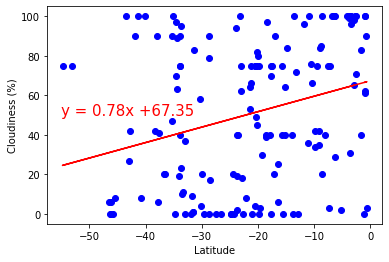

In [19]:
# Calculate the linear regression model for cloudiness in southern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Cloudiness"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,50), fontsize=15, color="red")
plt.savefig("southern_latitude_vs_cloudiness.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.11979479182002993


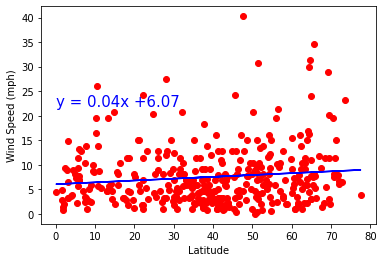

In [20]:
# Calculate the linear regression model for wind speed in northern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] > 0]["Wind Speed"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(x_values, regress_values, "b-")
plt.annotate(line_eq, (0,22), fontsize=15, color="blue")
plt.savefig("northern_latitude_vs_wind_speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.18987076767531352


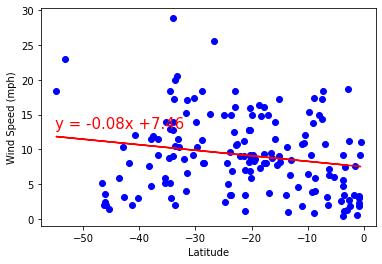

In [21]:
# Calculate the linear regression model for wind speed in southern hemisphere
x_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Lat"]
y_values = clean_city_data.loc[clean_city_data["Lat"] < 0]["Wind Speed"]

# Perform the linear regression using linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Create the equation for the linear model
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Print the r-value
print(f"The r-value is: {rvalue}")

# Create the scatter plot with titles and linear equation on plot
plt.scatter(x_values, y_values, marker="o", color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,13), fontsize=15, color="red")
plt.savefig("southern_latitude_vs_wind_speed.png")
plt.show()